# **Optimizers**

- Optimizers are algorithms or methods used to change the attributes of your neural network 
  - weights
  - bias
- In order to reduce the losses.

- In this noteboo we perform different Optimizers on MNIST Dataset

# Implementing all Optimizers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

## Importing the Datasets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape,x_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

### Flattening - 3D to 2D

In [5]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] * x_test.shape[2])

print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


### Scaling 

In [6]:
# Lets take the First Image and see the Range(min,max)
#print(x_train[0])
print(x_train[0].min(),x_train[0].max())

0 255


In [7]:
x_train = x_train / 255
x_test  = x_test / 255

print(x_train[0].min(),x_train[0].max())

0.0 1.0


In [8]:
# Target Classes - Which  number it is
y_train[0]

5

#### Convert Class level to Vector

In [9]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [10]:
# Change the class to One hot encoded vector
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Building a Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [12]:
x_train.shape[1]

784

In [13]:
## Assign parameters for the model

output_dim = 10
input_dim = x_train.shape[1]
batch_size = 128
epoch_to_put = 10

In [14]:
x_train.shape[1]

784

### Layer Building

In [15]:
seq = Sequential()
seq.add(Dense(600,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))

#Regularization Techniques
seq.add(BatchNormalization())
seq.add(Dropout(0.5))  # Disabling some Nodes.randomly--> prevent overfitting

seq.add(Dense(300,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))
seq.add(BatchNormalization())
seq.add(Dropout(0.5))

seq.add(Dense(140,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0,stddev=0.05,seed=None)))
seq.add(BatchNormalization())
seq.add(Dropout(0.5))

seq.add(Dense(output_dim,activation='softmax'))
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 600)               471000    
                                                                 
 batch_normalization (BatchN  (None, 600)              2400      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               180300    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 300)               0

## Stochastic Gradient Descent (SGD)

In [16]:
seq.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
hist = seq.fit(x_train,y_train,batch_size=batch_size, epochs = epoch_to_put,verbose=1,validation_data=(x_test,y_test)) # use verbose =0 to not display the epochs

Epoch 1/10
469/469 [==============================] - 9s 16ms/step - loss: 1.2094 - accuracy: 0.6197 - val_loss: 0.3545 - val_accuracy: 0.8972
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.5920 - accuracy: 0.8145 - val_loss: 0.2652 - val_accuracy: 0.9203
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4820 - accuracy: 0.8516 - val_loss: 0.2324 - val_accuracy: 0.9275
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4252 - accuracy: 0.8699 - val_loss: 0.2075 - val_accuracy: 0.9363
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3809 - accuracy: 0.8859 - val_loss: 0.1931 - val_accuracy: 0.9412
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3467 - accuracy: 0.8960 - val_loss: 0.1809 - val_accuracy: 0.9448
Epoch 7/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3269 - accuracy: 0.9016 - val_loss: 0.1707 - val_accuracy: 0.9479

### Evaluation

In [17]:
score = seq.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1475 - accuracy: 0.9533


In [18]:
print(score)

[0.14750027656555176, 0.9532999992370605]


In [19]:
def visuals(x,val_loss,trn_loss,ax,colors=['b']):
    ax.plot(x,val_loss,'-',label='Validation Loss')
    ax.plot(x,trn_loss,'-',label='Train Loss')
    
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [20]:
# Test score, Test Accuracy
score[0], score[1]

(0.14750027656555176, 0.9532999992370605)

## Visualize the Loss

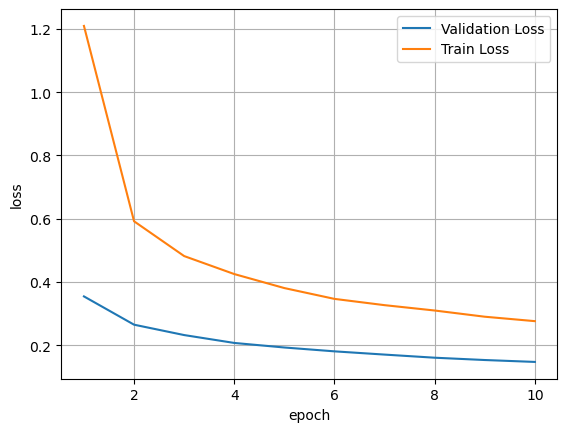

In [21]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x = list(range(1,epoch_to_put+1))
val_loss = hist.history['val_loss']
trn_loss = hist.history['loss']

visuals(x,val_loss,trn_loss,ax)

## ADAGRAD 

In [22]:
seq.compile(optimizer='Adagrad',loss='categorical_crossentropy',metrics=['accuracy'])
hist = seq.fit(x_train,y_train,batch_size=batch_size, epochs = epoch_to_put,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.2685 - accuracy: 0.9204 - val_loss: 0.1461 - val_accuracy: 0.9535
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2591 - accuracy: 0.9219 - val_loss: 0.1446 - val_accuracy: 0.9542
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2606 - accuracy: 0.9215 - val_loss: 0.1428 - val_accuracy: 0.9546
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2587 - accuracy: 0.9232 - val_loss: 0.1410 - val_accuracy: 0.9554
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2518 - accuracy: 0.9243 - val_loss: 0.1391 - val_accuracy: 0.9562
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2524 - accuracy: 0.9241 - val_loss: 0.1381 - val_accuracy: 0.9569
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2459 - accuracy: 0.9267 - val_loss: 0.1369 - val_accuracy: 0.9574

In [23]:
score = seq.evaluate(x_test,y_test,verbose=0)
print(score)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}')

[0.13293272256851196, 0.9585999846458435]
Test Score: 0.13293272256851196
Test Accuracy: 0.9585999846458435


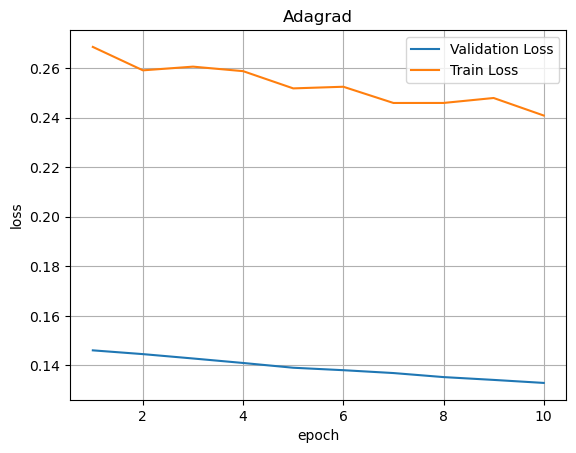

In [24]:
%matplotlib inline
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.title('Adagrad')

x = list(range(1,epoch_to_put+1))
val_loss = hist.history['val_loss']
trn_loss = hist.history['loss']

visuals(x,val_loss,trn_loss,ax) #color is defined in func itself

## RMS Prop

In [25]:
seq.compile(optimizer='RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])
hist = seq.fit(x_train,y_train,batch_size=batch_size, epochs = epoch_to_put,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.2345 - accuracy: 0.9305 - val_loss: 0.1191 - val_accuracy: 0.9660
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1698 - accuracy: 0.9509 - val_loss: 0.0911 - val_accuracy: 0.9732
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1372 - accuracy: 0.9600 - val_loss: 0.0879 - val_accuracy: 0.9742
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1169 - accuracy: 0.9661 - val_loss: 0.0726 - val_accuracy: 0.9795
Epoch 5/10
469/469 [==============================] - 8s 18ms/step - loss: 0.1024 - accuracy: 0.9704 - val_loss: 0.0712 - val_accuracy: 0.9801
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0981 - accuracy: 0.9712 - val_loss: 0.0682 - val_accuracy: 0.9804
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0896 - accuracy: 0.9739 - val_loss: 0.0689 - val_accuracy: 0.979

Test Score: 0.06371888518333435
Test Accuracy: 0.9821000099182129


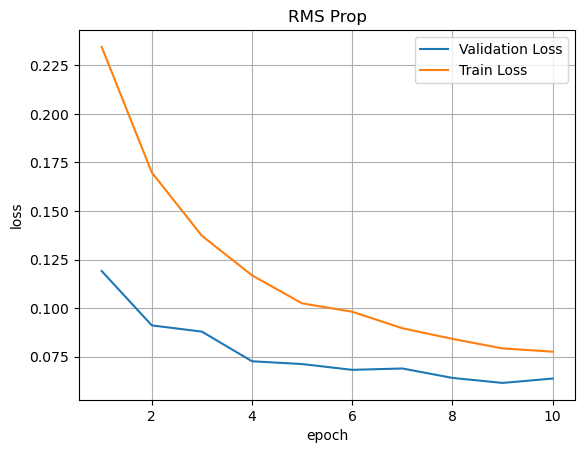

In [26]:
score = seq.evaluate(x_test,y_test,verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.title('RMS Prop')

x = list(range(1,epoch_to_put+1))
val_loss = hist.history['val_loss']
trn_loss = hist.history['loss']

visuals(x,val_loss,trn_loss,ax)

## ADAM

In [27]:
seq.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist = seq.fit(x_train,y_train,batch_size=batch_size, epochs = epoch_to_put,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.0820 - accuracy: 0.9758 - val_loss: 0.0646 - val_accuracy: 0.9814
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0791 - accuracy: 0.9767 - val_loss: 0.0611 - val_accuracy: 0.9809
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0744 - accuracy: 0.9779 - val_loss: 0.0586 - val_accuracy: 0.9822
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0738 - accuracy: 0.9778 - val_loss: 0.0580 - val_accuracy: 0.9832
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0706 - accuracy: 0.9782 - val_loss: 0.0580 - val_accuracy: 0.9838
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0586 - val_accuracy: 0.9832
Epoch 7/10
469/469 [==============================] - 8s 18ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0583 - val_accuracy: 0.983

Test Score: 0.062008947134017944
Test Accuracy: 0.9821000099182129


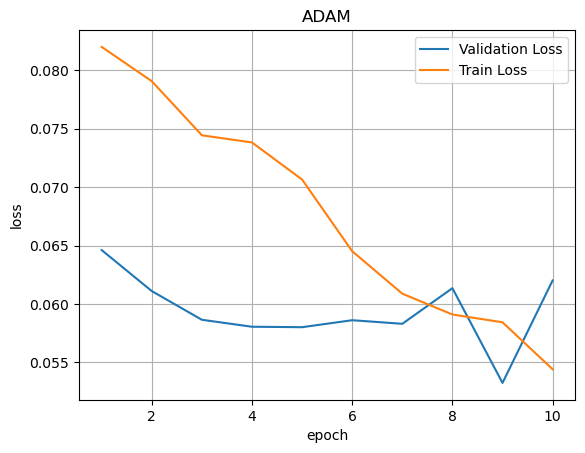

In [28]:
score = seq.evaluate(x_test,y_test,verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}')

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
plt.title('ADAM')

x = list(range(1,epoch_to_put+1))
val_loss = hist.history['val_loss']
trn_loss = hist.history['loss']

visuals(x,val_loss,trn_loss,ax)

## Things to do to better the performance of Optimizer

#### - Increase Epochs
#### - Regularization techniques
#### - Playy wih Layers
#### - Activation functions